In [1]:
"""
Zé Fonseca
01/02/2016
Simulate data that combines uncertainties in SNe classification, magnitude and redshift. 95% are SNeIa  
"""

import numpy as np
import scipy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [2]:
#cosmological functions
#general functions

def invH(z,OM,w):
    return (OM*(1+z)**3+(1-OM)*(1+z)**(3*(w+1)))**(-.5)
   
c=2.99792e5

def mu(z,OM,H0,w):
    if type(z)=='float' or type(z)=='int':
        return 5*np.log10((1+z)/H0*c*quad(invH,0,z,args=(OM,w))[0])+25
    else:
        dl=[]
        for i in range(len(z)):
            dl.append(quad(invH,0,z[i],args=(OM,w))[0])
        return 5*np.log10(np.array(dl)*(1+z)*c/H0)+25

In [3]:
z_max=1.0
z_min=0.015
N=1000
z=np.random.rand(N)*(z_max-z_min)+z_min
z.sort()
mu_t=mu(z,0.31,67.74,-1)
SNe=np.random.rand(N)
b=np.zeros(N)
sig_mu=np.zeros(N)
Ia=[]
nonIa=[]
for i in range(N):
    if SNe[i]<0.95:
        sig_mu[i]=0.2
        Ia.append(i)
    else:
        sig_mu[i]=1.5
        b[i]=2.0
        nonIa.append(i)
mu_o=np.random.randn(N)*sig_mu+mu_t+b
        

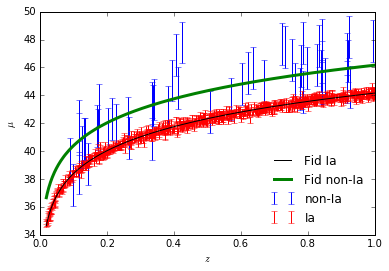

In [5]:
plt.errorbar(z[nonIa],mu_o[nonIa],yerr=[sig_mu[nonIa],sig_mu[nonIa]],label='non-Ia',ls='')
plt.errorbar(z[Ia],mu_o[Ia],yerr=[sig_mu[Ia],sig_mu[Ia]],color='r',ms=2,label='Ia',ls='')
plt.plot(z,mu_t,'k',label='Fid Ia')
plt.plot(z,mu_t+2,'g',label='Fid non-Ia',lw=3)
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.legend(loc=4,fontsize=12,frameon=False)
plt.savefig('sim_data_alltypes_nozuncertainty_95pIa.pdf')
plt.show()

In [6]:
z_b21=z+np.random.randn(N)*0.04*(1+z)
index=np.argwhere(z_b21<0)
while len(index)>0:
    z_b21[index]=z[index]+np.random.randn(len(index))*0.04*(1+z[index])
    index=np.argwhere(z_b21<0)

/Users/Ze/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


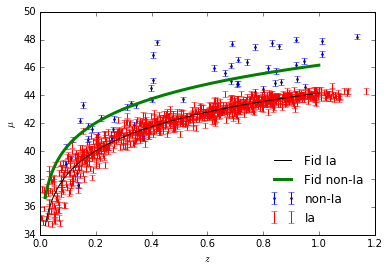

In [11]:
plt.errorbar(z_b21[nonIa],mu_o[nonIa],yerr=[0.2*np.ones(len(nonIa)),0.2*np.ones(len(nonIa))],marker='o',ms=2,label='non-Ia',ls='')
plt.errorbar(z_b21[Ia],mu_o[Ia],yerr=[sig_mu[Ia],sig_mu[Ia]],color='r',ms=2,label='Ia',ls='')
plt.plot(z,mu_t,'k',label='Fid Ia')
plt.plot(z,mu_t+2,'g',label='Fid non-Ia',lw=3)
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.legend(loc=4,fontsize=12,frameon=False)
plt.savefig('sim_data_alltypes_zuncertainty_95p.pdf')
plt.show()

In [61]:
snetype=np.ones(N)
snetype[nonIa]=0
np.savetxt('zf_chains_data/fulldataset_zf.txt',np.c_[z,z_b21,mu_t,mu_o,snetype],fmt=['%2.3f']*4+['%1.f'],\
           header='\n'.join(["Error in z %.2f" %0.04,"Error in mu %.2f for Ia and %.2f for nonaIa" %(0.2,1.5),\
                             "Type=1 for Ia, 0 otherwise","z  z_shifted   mu_t   mu_o   type"]))